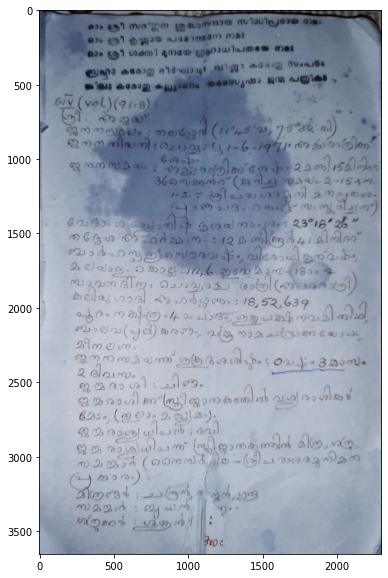

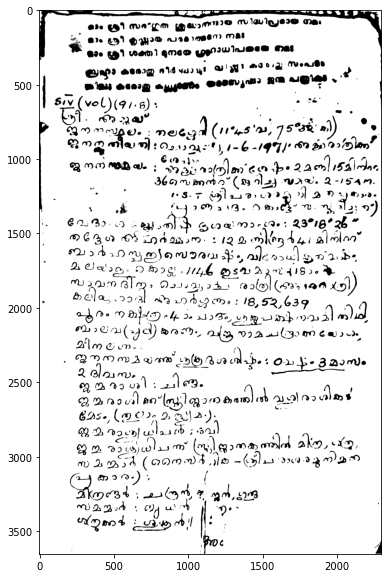

In [5]:
import cv2
import numpy as np
import argparse
import ntpath
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

import imutils

#input and display
#I = cv2.imread('D:/Dataset/ar/1.jpg')
I = cv2.imread('D:/Dataset/1.jpg')
a = np.double(I)
b = a + 15
img = np.uint8(b)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rows, cols = gray.shape
threshold = 10

#size of output window
M = int(np.floor(rows/16) + 1)
N = int(np.floor(cols/16) + 1)

#image border
Mextend = round(M/2)-1
Nextend = round(N/2)-1
    

temp =cv2.copyMakeBorder(gray, top=Mextend, bottom=Mextend, left=Nextend,
                          right=Nextend, borderType=cv2.BORDER_REFLECT) 
  

    
windows = np.zeros((M,N),np.int32)
    
#algo
Integral = cv2.integral(temp, windows,-1)
    
# Integral image size
inrows, incols = Integral.shape
    
# Memory allocation for cumulative region image
result = np.zeros((rows, cols))

# Image cumulative pixels in windows size calculation
for i in range(inrows-M):
    for j in range(incols-N):
        
        result[i, j] = Integral[i+M, j+N] - Integral[i, j+N] + Integral[i, j] - Integral[i+M,j]
     
# Output binary image memory allocation    
binary = np.ones((rows, cols), dtype=np.bool)
    
# Gray image weighted by windows size
gray = (gray).astype('float64')*M*N
    
# Output image binarization
binary[gray <= result*(100.0 - threshold)/100.0] = False
#gamma_corrected = np.array(255*(binary / 255) ** 0.5, dtype = 'uint8')
#output     
binary=(255*binary).astype(np.uint8)
cv2.imwrite('D:/1_output.jpg', binary)

plt.figure(figsize=(10,10))
plt.title("")
plt.imshow(I) 
plt.show()

plt.figure(figsize=(10,10))
plt.title("")
plt.imshow(binary,cmap='gray') 
plt.show()
#----------------#
#gray = cv2.cvtColor(binary, cv2.COLOR_BGR2GRAY)
